In [ ]:
from google.colab import drive
drive.mount('/content/drive')   # follow the authorization link


Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/My Drive/gesture_npz.zip" -d /content
# After this, /content/data/ will hold 14 .npz files
!ls /content/data | head


data_backward_fast.npz
data_backward_fine.npz
data_down_fast.npz
data_down_fine.npz
data_forward_fast.npz
data_forward_fine.npz
data_left_fast.npz
data_left_fine.npz
data_neutral.npz
data_pickup.npz


In [ ]:
!pip install --quiet numpy scikit-learn tensorflow matplotlib


Total samples: (15075, 42) (15075,)
Epoch 1/100
142/142 - 3s - 22ms/step - accuracy: 0.3632 - loss: 2.0942 - val_accuracy: 0.3884 - val_loss: 2.2236
Epoch 2/100
142/142 - 1s - 7ms/step - accuracy: 0.6603 - loss: 1.1044 - val_accuracy: 0.7648 - val_loss: 1.4728
Epoch 3/100
142/142 - 1s - 4ms/step - accuracy: 0.7651 - loss: 0.7744 - val_accuracy: 0.8136 - val_loss: 0.7857
Epoch 4/100
142/142 - 1s - 4ms/step - accuracy: 0.8082 - loss: 0.6264 - val_accuracy: 0.9363 - val_loss: 0.3275
Epoch 5/100
142/142 - 1s - 5ms/step - accuracy: 0.8352 - loss: 0.5391 - val_accuracy: 0.9423 - val_loss: 0.2511
Epoch 6/100
142/142 - 1s - 4ms/step - accuracy: 0.8415 - loss: 0.4947 - val_accuracy: 0.9058 - val_loss: 0.3102
Epoch 7/100
142/142 - 1s - 4ms/step - accuracy: 0.8650 - loss: 0.4450 - val_accuracy: 0.9469 - val_loss: 0.1951
Epoch 8/100
142/142 - 1s - 4ms/step - accuracy: 0.8681 - loss: 0.4192 - val_accuracy: 0.9323 - val_loss: 0.2172
Epoch 9/100
142/142 - 1s - 4ms/step - accuracy: 0.8760 - loss: 0.39


Test accuracy: 0.9728
Model saved to: /content/drive/My Drive/model_nn_14classes__20250611__215933__acc_0.9728.h5


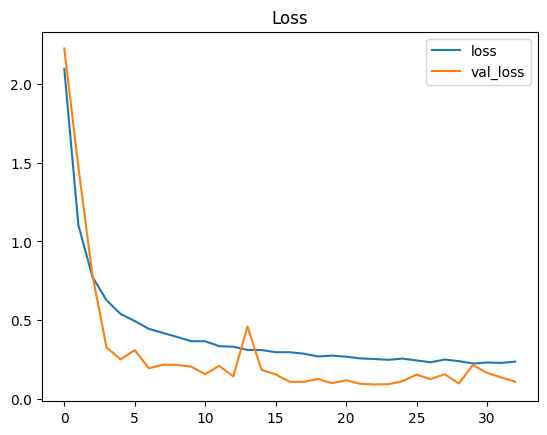

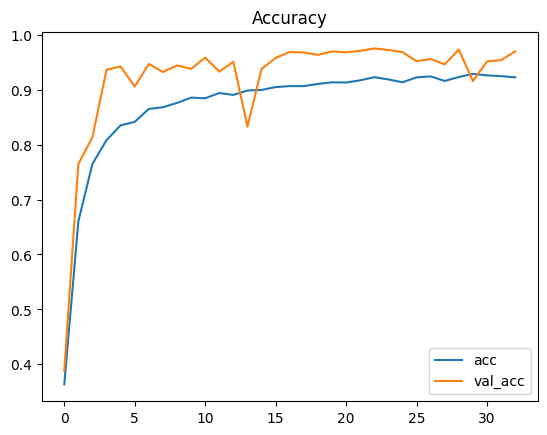

In [ ]:
import os, datetime as dt, numpy as np, tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ---- 1. class list ----
class_names = [
    'up_fine','up_fast','down_fine','down_fast',
    'left_fine','left_fast','right_fine','right_fast',
    'forward_fine','forward_fast','backward_fine','backward_fast',
    'pickup','neutral'
]

# ---- 2. load & stack ----
X_list, y_list = [], []
for idx, cname in enumerate(class_names):
    path = f'/content/data/data_{cname}.npz'
    arr = np.load(path)
    X_list.append(arr['X'])
    y_list.append(arr['y'])
X = np.vstack(X_list).astype('float32')
y = np.concatenate(y_list).astype('int32')
print("Total samples:", X.shape, y.shape)

# ---- 3. split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=1
)

# ---- 4. model ----
early_stop = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model = tf.keras.Sequential([
    tf.keras.layers.Input((X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(class_names), activation='softmax'),
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(1e-3),
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=64,
    validation_split=0.25,
    shuffle=True, callbacks=[early_stop],
    verbose=2
)

# ---- 5. evaluate ----
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {acc:.4f}")

# ---- 6. save model back to Drive ----
stamp = dt.datetime.now().strftime("%Y%m%d__%H%M%S")
save_path = f"/content/drive/My Drive/model_nn_14classes__{stamp}__acc_{acc:.4f}.h5"
model.save(save_path)
print("Model saved to:", save_path)

# ---- 7. quick plots ----
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss'); plt.show()

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy'); plt.show()


In [ ]:
from google.colab import files
files.download(save_path)       # prompts a browser download


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>